# Actividad 8: Forecasting (Regresión temporal)

En este notebook se analiza una serie temporal mensual de pasajeros de aerolíneas desde 1949 hasta 1960.  
Se aplican técnicas de modelado para predecir la demanda futura usando regresión lineal sobre la serie temporal.

Dataset: AirPassengers.csv


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt


In [17]:
# Cargar y limpiar columnas
df = pd.read_csv('AirPassengers.csv')
df.columns = df.columns.str.strip()
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

# Asegurar que Month sea datetime y usarla como índice
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Mostrar primeros datos
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


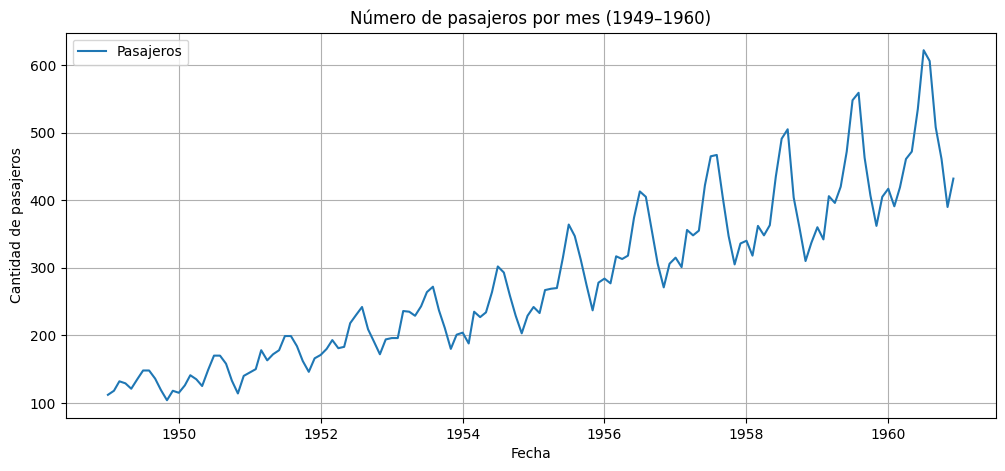

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(df['Passengers'], label='Pasajeros')
plt.title('Número de pasajeros por mes (1949–1960)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasajeros')
plt.legend()
plt.grid()
plt.show()


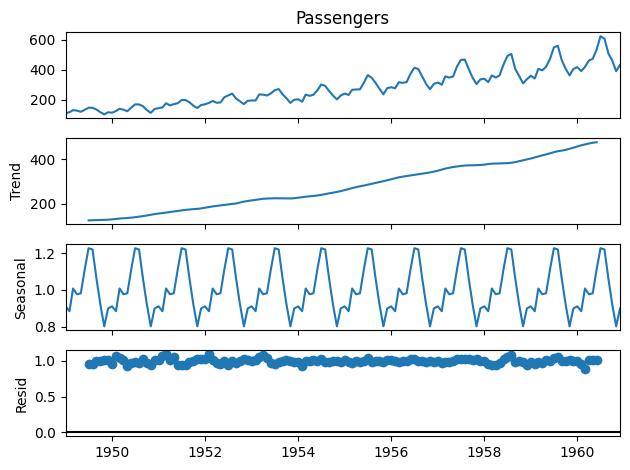

In [19]:
result = seasonal_decompose(df['Passengers'], model='multiplicative')
result.plot()
plt.show()


In [20]:
adf = adfuller(df['Passengers'])
print(f'ADF Statistic: {adf[0]}')
print(f'p-value: {adf[1]}')

if adf[1] < 0.05:
    print("La serie es estacionaria")
else:
    print("La serie NO es estacionaria")


ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
La serie NO es estacionaria


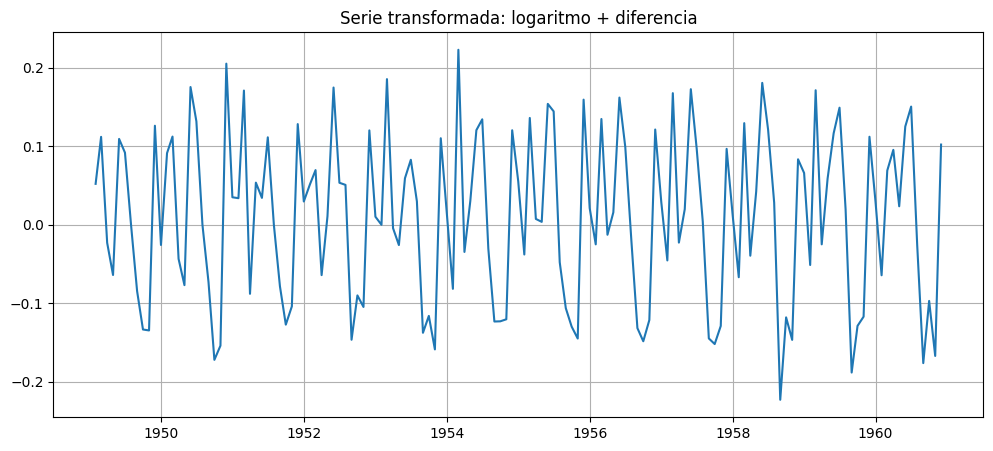

In [21]:
# Aplicar log y diferencia
df['Log'] = np.log(df['Passengers'])
df['Log_diff'] = df['Log'].diff()
df.dropna(inplace=True)

# Graficar transformación
plt.figure(figsize=(12,5))
plt.plot(df['Log_diff'])
plt.title('Serie transformada: logaritmo + diferencia')
plt.grid()
plt.show()


In [22]:
# Resetear índice y crear columna de tiempo numérico
df_reset = df.reset_index()
df_reset['Time'] = np.arange(len(df_reset))

# Variables
X = df_reset[['Time']]
y = df_reset['Passengers']

# División entrenamiento / prueba (últimos 12 puntos)
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]
fechas_pred = df_reset['Month'].iloc[-12:]


In [23]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Evaluación
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 78.70888160636338


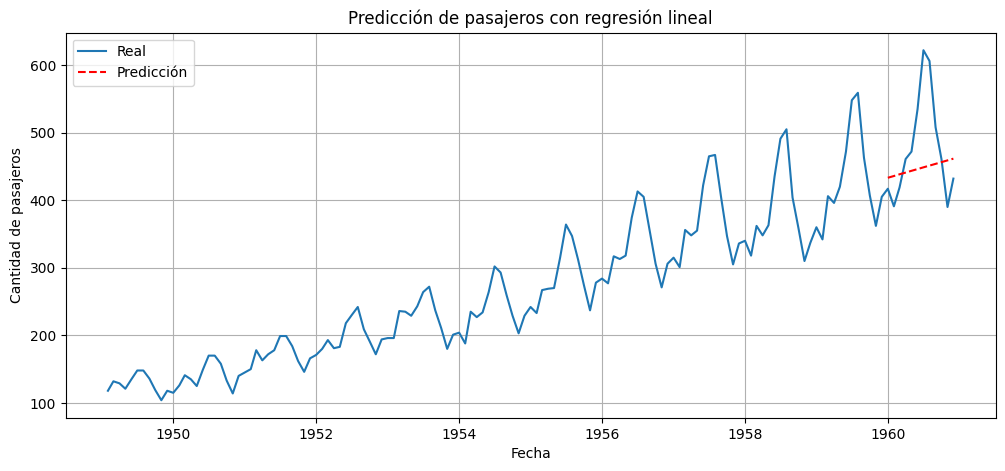

In [24]:
plt.figure(figsize=(12,5))
plt.plot(df_reset['Month'], y, label='Real')
plt.plot(fechas_pred, y_pred, color='red', linestyle='--', label='Predicción')
plt.title('Predicción de pasajeros con regresión lineal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasajeros')
plt.legend()
plt.grid()
plt.show()
